In [1]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline

In [2]:
df = pd.read_table("Taxonomic-Binning/tax.summary.all.tab", header=0, index_col=0)
mapping_file = pd.read_table("mapping_file.tab", header=0, index_col=0)

In [3]:
def select_taxonomic_rank(df, identifier, col_row):
    if col_row == "row":
        filtered = df[df.index.str.contains(identifier)]
        return filtered
    elif col_row == "column":
        filtered = df.filter(regex=identifier, axis=1)
        return filtered
    
phylum = select_taxonomic_rank(df, "p__", "row")
family = select_taxonomic_rank(df, "f__", "row")
genus = select_taxonomic_rank(df, "g__", "row")

In [6]:
df_T = df.T
merged = pd.concat([mapping_file, df_T], axis=1, sort=True)

In [7]:
def select_subset(df, col, subset, col_2=None, subset2=None):
    if not subset2:
        df_subset = df[df[col] == subset]
        df_subset = df_subset.select_dtypes(exclude=['object'])
        return df_subset
    elif subset2: 
        df_subset = df[df[col] == subset]
        df_subset_2 = df[df[col_2] == subset2]
        df_subset_2 = df_subset.select_dtypes(exclude=['object'])
        return df_subset_2

In [8]:
wk_5 = select_subset(merged, "Age", "5wk", "Genotype", "tg/tg")
wk_5_phylum = select_taxonomic_rank(wk_5, "p__", "column")

In [9]:
#def subset_taxa_abundance()
wk_5_phylum

,p__Actinobacteria,p__Bacteroidetes,p__Candidatus Saccharibacteria,p__Cyanobacteria/Chloroplast,p__Deferribacteres,p__Firmicutes,p__Proteobacteria,p__Tenericutes,p__unknown_ Bacteria,p__Verrucomicrobia
01.AV967,0.233623,16.697711,0.476717,0.003157,3.753749,76.170481,1.528019,0.883978,0.249408,0.003157
02.AV968,0.055794,10.889909,0.284040,0.000000,9.134945,78.004616,0.928204,0.654308,0.048185,0.000000
03.AV971,0.262543,4.786909,0.751663,0.000000,5.409099,86.423305,1.729905,0.618594,0.014386,0.003596
04.AV972,0.073460,20.015217,0.695246,0.000000,3.728093,72.507608,1.477070,1.361633,0.139049,0.002624
05.AV974,0.059183,9.051230,0.388385,0.000000,3.573146,85.307934,1.031996,0.573331,0.000000,0.014796
06.AV996,0.032566,5.669717,0.182369,0.000000,4.200997,88.826652,0.674113,0.367994,0.045592,0.000000
08.AV583,0.100358,12.354063,0.227478,0.000000,0.093667,85.404610,1.575620,0.016726,0.003345,0.224133
09.AV584,0.043940,16.321909,0.415737,0.000000,0.878794,80.416413,0.807815,0.844994,0.270398,0.000000
10.AV587,0.133007,18.424921,0.560028,0.000000,4.952748,73.115156,1.494575,0.661533,0.658033,0.000000
11.AV588,0.055052,14.928756,1.065415,0.000000,1.343912,80.158679,1.311528,0.272021,0.861399,0.003238


In [25]:
def plot_stacked_bar(df, T=None):
    if not T: 
        sns.set()
        return df.plot(kind='bar', stacked=True, figsize=(15,8), legend=True, grid=False)
    elif T: 
        sns.set()
        return df.plot(kind='bar', stacked=True, figsize=(15,8), legend=True, grid=False)

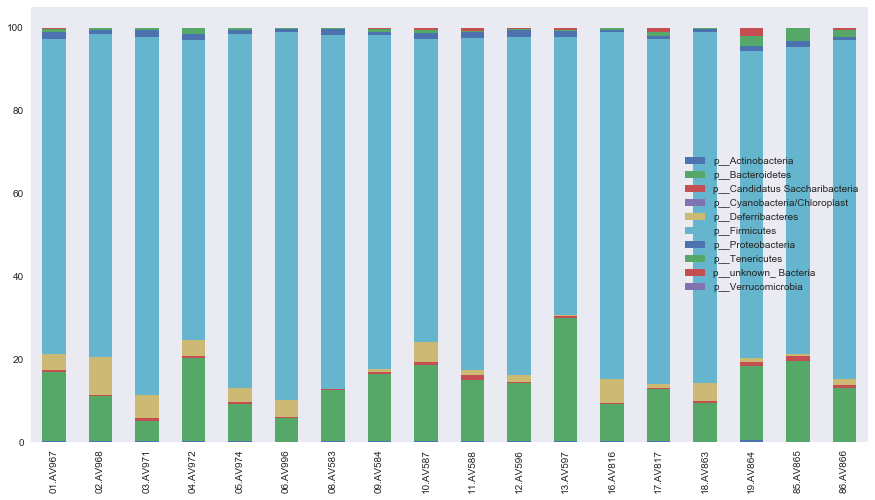

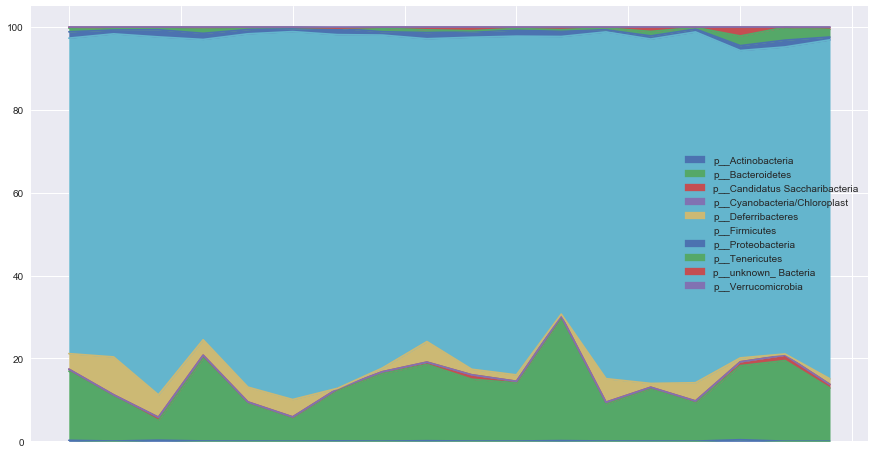

In [26]:
plot_stacked_bar(wk_5_phylum)
wk_5_phylum.plot(kind='area', figsize=(15,8))

In [15]:
# need to write function to group and calculate means 

test = wk_5_phylum.T

In [17]:
# test.groupby(test.index).mean()

,01.AV967,02.AV968,03.AV971,04.AV972,05.AV974,06.AV996,08.AV583,09.AV584,10.AV587,11.AV588,12.AV596,13.AV597,16.AV816,17.AV817,18.AV863,19.AV864,85.AV865,86.AV866
p__Actinobacteria,0.233623,0.055794,0.262543,0.073460,0.059183,0.032566,0.100358,0.043940,0.133007,0.055052,0.061612,0.157194,0.062765,0.073652,0.030169,0.374968,0.021311,0.021236
p__Bacteroidetes,16.697711,10.889909,4.786909,20.015217,9.051230,5.669717,12.354063,16.321909,18.424921,14.928756,14.059383,29.604858,8.986524,12.641446,9.298740,17.876869,19.478409,12.843491
p__Candidatus Saccharibacteria,0.476717,0.284040,0.751663,0.695246,0.388385,0.182369,0.227478,0.415737,0.560028,1.065415,0.363807,0.468500,0.387668,0.334784,0.402253,0.932354,1.291990,0.883415
p__Cyanobacteria/Chloroplast,0.003157,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
p__Deferribacteres,3.753749,9.134945,5.409099,3.728093,3.573146,4.200997,0.093667,0.878794,4.952748,1.343912,1.540312,0.471582,5.678420,0.917308,4.404666,0.942488,0.285037,1.342111
p__Firmicutes,76.170481,78.004616,86.423305,72.507608,85.307934,88.826652,85.404610,80.416413,73.115156,80.158679,81.786175,67.029343,83.725309,83.146970,84.697640,74.223461,74.130904,81.826290
p__Proteobacteria,1.528019,0.928204,1.729905,1.477070,1.031996,0.674113,1.575620,0.807815,1.494575,1.311528,1.472832,1.470226,0.505815,0.763308,0.697238,1.175576,1.643624,0.688044
p__Tenericutes,0.883978,0.654308,0.618594,1.361633,0.573331,0.367994,0.016726,0.844994,0.661533,0.272021,0.378477,0.181852,0.454126,1.081353,0.375436,2.330884,3.114095,1.856020
p__Verrucomicrobia,0.003157,0.000000,0.003596,0.002624,0.014796,0.000000,0.224133,0.000000,0.000000,0.003238,0.005868,0.000000,0.003692,0.013391,0.003352,0.000000,0.023975,0.059461
p__unknown_ Bacteria,0.249408,0.048185,0.014386,0.139049,0.000000,0.045592,0.003345,0.270398,0.658033,0.861399,0.331534,0.616447,0.195680,1.027787,0.090507,2.143400,0.010656,0.479932
